This project aims to explore the Spotify Dataset and gain insights from it. The dataset has been taken from Kaggle website.

Url:- https://www.kaggle.com/datasets/meeratif/spotify-most-streamed-songs-of-all-time



#Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
df = pd.read_csv("Spotify most streamed.csv")

In [3]:
df.columns

Index(['Artist and Title', 'Streams', 'Daily'], dtype='object')

In [4]:
df.shape

(2500, 3)

# Data Preprocessing

Step -1 : To rempve duplicates from the dataset

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape         #this dataset didn;t have any dataset

(2500, 3)

Step-2: To handle null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Artist and Title  2500 non-null   object
 1   Streams           2500 non-null   object
 2   Daily             2497 non-null   object
dtypes: object(3)
memory usage: 78.1+ KB


The column "Daily" has 3 null values.

In [8]:
df.isnull().sum()/df.shape[0]  * 100

Artist and Title    0.00
Streams             0.00
Daily               0.12
dtype: float64

Since the percentage of null values is less than 5, the rows with null values can be dropped.

In [10]:
df.dropna(subset=['Daily'],inplace=True)

In [11]:
df.shape

(2497, 3)

In [12]:
#reindex the dataframe
df.reset_index(drop=True,inplace=True)

In [14]:
df.info()          #no null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2497 entries, 0 to 2496
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Artist and Title  2497 non-null   object
 1   Streams           2497 non-null   object
 2   Daily             2497 non-null   object
dtypes: object(3)
memory usage: 58.6+ KB


Step-3: Create 2 columns - Artist and Title

In [15]:
Artist = [ ]
Title = [ ]
for i in list(df['Artist and Title']):
  p = i.split("-")
  Artist.append(p[0].strip())
  Title.append(p[1].strip())


In [16]:
#create a new dataframe for Artist and Title
data = pd.DataFrame({"Artist":Artist,"Title":Title})
data

,Artist,Title
0,The Weeknd,Blinding Lights
1,Ed Sheeran,Shape of You
2,Lewis Capaldi,Someone You Loved
3,Post Malone,Sunflower
4,Tones And I,Dance Monkey
...,...,...
2492,Richard Marx,Right Here Waiting
2493,The Neighbourhood,You Get Me So High
2494,Clairo,Bubble Gum
2495,Bing Crosby,White Christmas


In [17]:
#merging data with df as a new dataframe
dataset = df.join(data)

In [18]:
dataset.head()

,Artist and Title,Streams,Daily,Artist,Title
0,The Weeknd - Blinding Lights,"3,783,983,806","1,736,378",The Weeknd,Blinding Lights
1,Ed Sheeran - Shape of You,"3,616,649,759","1,135,140",Ed Sheeran,Shape of You
2,Lewis Capaldi - Someone You Loved,"2,958,875,491","1,522,093",Lewis Capaldi,Someone You Loved
3,Post Malone - Sunflower,"2,898,311,408","1,871,177",Post Malone,Sunflower
4,Tones And I - Dance Monkey,"2,896,024,418","666,818",Tones And I,Dance Monkey


Step -4: Dropping the column 'Artist and Title'

In [19]:
dataset.drop(['Artist and Title'],axis="columns",inplace=True)

In [20]:
dataset.head()

,Streams,Daily,Artist,Title
0,"3,783,983,806","1,736,378",The Weeknd,Blinding Lights
1,"3,616,649,759","1,135,140",Ed Sheeran,Shape of You
2,"2,958,875,491","1,522,093",Lewis Capaldi,Someone You Loved
3,"2,898,311,408","1,871,177",Post Malone,Sunflower
4,"2,896,024,418","666,818",Tones And I,Dance Monkey


Step -5: Removing commas from the columns "Streams" and "Daily"

In [21]:
dataset['Streams'] = dataset['Streams'].replace(',',"",regex=True)
dataset['Daily'] = dataset['Daily'].replace(',','',regex=True)

In [22]:
dataset.head()

,Streams,Daily,Artist,Title
0,3783983806,1736378,The Weeknd,Blinding Lights
1,3616649759,1135140,Ed Sheeran,Shape of You
2,2958875491,1522093,Lewis Capaldi,Someone You Loved
3,2898311408,1871177,Post Malone,Sunflower
4,2896024418,666818,Tones And I,Dance Monkey


OBJECTIVES:

1) Total number of streams of artists

2) Top 5 artists with maximum number of streams

3) Top 5 most explored artists

4)Top 5 songs with highest streams

In [23]:
streams = dict()
count =0
for i in list(dataset['Artist'].unique()):
  count = (dataset[dataset['Artist']==i]['Streams']).astype(int).sum()
  streams[i] = count//(10**7)

print(streams)   ## in millions

{'The Weeknd': 2893, 'Ed Sheeran': 2877, 'Lewis Capaldi': 629, 'Post Malone': 2460, 'Tones And I': 289, 'Drake': 2963, 'The Kid LAROI': 404, 'Imagine Dragons': 1688, 'Harry Styles': 1219, 'Glass Animals': 263, 'The Chainsmokers': 1202, 'Shawn Mendes': 1327, 'James Arthur': 613, 'Billie Eilish': 2283, 'The Neighbourhood': 456, 'Dua Lipa': 1309, 'Juice WRLD': 1279, 'Queen': 1228, 'Lady Gaga': 990, 'Hozier': 304, 'Justin Bieber': 1685, 'John Legend': 212, 'XXXTENTACION': 1684, 'Vance Joy': 297, 'Ariana Grande': 2065, 'OneRepublic': 685, 'Travis Scott': 1051, 'Twenty One Pilots': 655, 'Avicii': 879, 'Macklemore & Ryan Lewis': 306, 'Passenger': 197, 'Kendrick Lamar': 1191, 'Lil Uzi Vert': 603, 'Calvin Harris': 1552, 'Camila Cabello': 557, 'Olivia Rodrigo': 999, 'Marshmello': 765, 'Tom Odell': 189, 'DJ Snake': 611, 'Eminem': 1901, 'J. Cole': 683, 'The Killers': 353, 'Sam Smith': 1070, 'Lil Nas X': 819, 'Arctic Monkeys': 839, 'Major Lazer': 483, 'Halsey': 340, 'Coldplay': 1457, 'SAINt JHN': 1

# Total number of streams of each artist

In [29]:
#create a dataframe with streams
tot_streams = pd.DataFrame(streams.values(),index = list(streams.keys()),columns=['Total number of streams (in millions)'])
tot_streams = tot_streams.sort_values(by = 'Total number of streams (in millions)',ascending=False)
tot_streams

,Total number of streams (in millions)
Drake,2963
The Weeknd,2893
Ed Sheeran,2877
Bad Bunny,2866
Taylor Swift,2618
...,...
The Turtles,40
Pablo AlborÃ¡n,40
Imanbek,40
Richard Marx,39


# Top 5 artists with the highest streams

In [60]:
sns.set_palette("rocket")

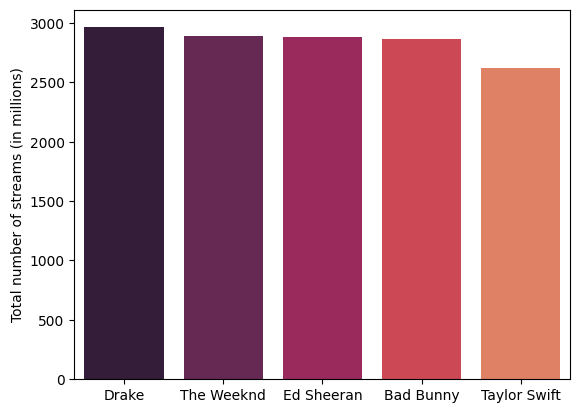

In [61]:
#visualization
sns.color_palette("rocket")
sns.barplot(x=tot_streams.index[0:5],y=tot_streams['Total number of streams (in millions)'][0:5])
plt.show()

# Top 5 most explored artists

In [33]:
explored = dict()
for i in dataset['Artist'].unique():
  songs = list(dataset[dataset['Artist']==i]['Title'])
  explored[i] = songs

print(explored)

{'The Weeknd': ['Blinding Lights', 'Starboy', 'The Hills', 'Die For You', 'Save Your Tears', 'I Feel It Coming', "Can't Feel My Face", 'Call Out My Name', 'Earned It (Fifty Shades Of Grey)', 'Save Your Tears', 'In Your Eyes', 'Often', 'Heartless', 'Pray For Me', 'I Was Never There', 'Reminder', 'After Hours', 'Stargirl Interlude', 'Party Monster', 'Die For You', 'Wicked Games', 'In The Night', 'Take My Breath', 'Acquainted', 'Is There Someone Else?'], 'Ed Sheeran': ['Shape of You', 'Perfect', 'Thinking out Loud', 'Photograph', "I Don't Care", 'Bad Habits', 'Shivers', 'Beautiful People', 'Happier', 'Castle on the Hill', 'Galway Girl', 'I See Fire', 'The A Team', 'Perfect Duet (Ed Sheeran & BeyoncÃ©)', 'South of the Border', "Don't", 'Supermarket Flowers', 'Dive', 'Tenerife Sea', 'Sing', 'Lego House', 'Give Me Love', 'Kiss Me', 'Afterglow'], 'Lewis Capaldi': ['Someone You Loved', 'Before You Go', 'Bruises', 'Hold Me While You Wait'], 'Post Malone': ['Sunflower', 'rockstar', 'Circles', 'C

In [34]:
diff_songs = {}
for i in explored:
  diff_songs[i] = len(i)

print(diff_songs)   #number of songs explored

{'The Weeknd': 10, 'Ed Sheeran': 10, 'Lewis Capaldi': 13, 'Post Malone': 11, 'Tones And I': 11, 'Drake': 5, 'The Kid LAROI': 13, 'Imagine Dragons': 15, 'Harry Styles': 12, 'Glass Animals': 13, 'The Chainsmokers': 16, 'Shawn Mendes': 12, 'James Arthur': 12, 'Billie Eilish': 13, 'The Neighbourhood': 17, 'Dua Lipa': 8, 'Juice WRLD': 10, 'Queen': 5, 'Lady Gaga': 9, 'Hozier': 6, 'Justin Bieber': 13, 'John Legend': 11, 'XXXTENTACION': 12, 'Vance Joy': 9, 'Ariana Grande': 13, 'OneRepublic': 11, 'Travis Scott': 12, 'Twenty One Pilots': 17, 'Avicii': 6, 'Macklemore & Ryan Lewis': 23, 'Passenger': 9, 'Kendrick Lamar': 14, 'Lil Uzi Vert': 12, 'Calvin Harris': 13, 'Camila Cabello': 14, 'Olivia Rodrigo': 14, 'Marshmello': 10, 'Tom Odell': 9, 'DJ Snake': 8, 'Eminem': 6, 'J. Cole': 7, 'The Killers': 11, 'Sam Smith': 9, 'Lil Nas X': 9, 'Arctic Monkeys': 14, 'Major Lazer': 11, 'Halsey': 6, 'Coldplay': 8, 'SAINt JHN': 9, 'Bad Bunny': 9, 'Maroon 5': 8, 'Mark Ronson': 11, 'Alan Walker': 11, 'Mike Posner':

In [38]:
#singers and total no.of songs as a dataframe

MusicExplored = pd.DataFrame(list(diff_songs.values()),index = np.array(dataset['Artist'].unique()),columns = ["Total no.of songs explored"])
MusicExplored.sort_values(by='Total no.of songs explored',ascending = False)

,Total no.of songs explored
Edward Sharpe & The Magnetic Zeros,34
Frankie Valli & The Four Seasons,32
Lil Jon & The East Side Boyz,28
Creedence Clearwater Revival,28
The Red Jumpsuit Apparatus,26
...,...
U2,2
LP,2
a,1
T,1


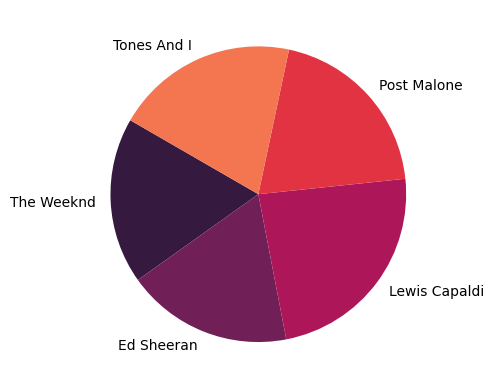

In [63]:
#visualization
plt.pie(MusicExplored['Total no.of songs explored'][0:5],labels = list(MusicExplored.index)[0:5],colors=sns.color_palette("rocket"),startangle=150)
plt.show()
